In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
from random import choice
import copy

In [2]:
BASE_WORKDIR='data/iops2/'



In [3]:

def read_values(backend, test_subject, test_type, mix_type, vars_dict):

    for var in vars_dict.keys():

        path = BASE_WORKDIR + '/' + backend + '/' + test_subject + '/' + test_type + '/' + str(var) + '/' + mix_type + '/'
        
        for filename in os.listdir(path):
            f = open(path + filename, 'r')
            value = f.read().strip('\n')
            vars_dict[var].append(int(value))
            
            
            f.close()
            
    return vars_dict
            
            
            
            
def plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, figname):
    
    x = np.arange(1,len(x_labels)+1)

    plt.bar(x-0.125, y_host, color='r', width = 0.25)
    plt.bar(x+0.125, y_pod, color='b', width = 0.25)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(x, x_labels)
    
    red_patch = mpatches.Patch(color='red', label='Host')
    blue_patch = mpatches.Patch(color='blue', label='Pod')
    plt.legend(handles=[red_patch,blue_patch])


    plt.savefig(figname)
    plt.show()


def take_median(vars_dict):
    medians_list = []
    #print sorted(vars_dict.keys())
    for key in sorted(vars_dict.keys()):
        median = np.median(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        medians_list.append(median)
     #   print medians_list
        
    return np.asarray(medians_list)

def take_mean(vars_dict):
    means_list = []
    for key in sorted(vars_dict.keys()):
        mean = np.mean(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        means_list.append(mean)
     #   print medians_list
        
    return means_list

def take_std(vars_dict):
    stds_list = []
    for key in sorted(vars_dict.keys()):
        std = np.std(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        stds_list.append(std)
     #   print medians_list
        
    return stds_list
    
    

    
    


            



    

In [4]:
# test code

# get read IOPS from blocksize test on host using gluster
host_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_read_iops = read_values('gluster','host','test_bs', 'read', host_gluster_bs_read_dict)



host_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_write_iops = read_values('gluster','host','test_bs', 'write', host_gluster_bs_write_dict)

#pod_gluster_bs_read_dict = { "4": [], "8": [], "16": [], "32": [], "64": [] }
#pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)


In [5]:
# GLUSTER HOST RAMPTIME

host_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_read_iops = read_values('gluster','host','test_rt', 'read', host_gluster_rt_read_dict)


host_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_write_iops = read_values('gluster','host','test_rt', 'write', host_gluster_rt_write_dict)

In [195]:
# GLUSTER HOST IODEPTH

host_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_read_iops = read_values('gluster','host','test_depth', 'read', host_gluster_depth_read_dict)


host_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_write_iops = read_values('gluster','host','test_depth', 'write', host_gluster_depth_write_dict)

In [7]:
# GLUSTER POD BLOCKSIZE

pod_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)




pod_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_write_iops = read_values('gluster','pod','test_bs', 'write', pod_gluster_bs_write_dict)










In [8]:
# GLUSTER POD RAMPTIME

pod_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_read_iops = read_values('gluster','pod','test_rt', 'read', pod_gluster_rt_read_dict)


pod_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_write_iops = read_values('gluster','pod','test_rt', 'write', pod_gluster_rt_write_dict)

In [196]:
# GLUSTER POD IODEPTH

pod_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_read_iops = read_values('gluster','pod','test_depth', 'read', pod_gluster_depth_read_dict)


pod_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_write_iops = read_values('gluster','pod','test_depth', 'write', pod_gluster_depth_write_dict)

In [10]:
######### RBD ##############

In [11]:
# RBD HOST BLOCKSIZE

host_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_read_iops = read_values('rbd','host','test_bs', 'read', host_rbd_bs_read_dict)




host_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_write_iops = read_values('rbd','host','test_bs', 'write', host_rbd_bs_write_dict)




In [12]:
# RBD POD BLOCKSIZE

pod_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_read_iops = read_values('rbd','pod','test_bs', 'read', pod_rbd_bs_read_dict)




pod_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_write_iops = read_values('rbd','pod','test_bs', 'write', pod_rbd_bs_write_dict)




In [13]:
# RBD HOST RAMPTIME

host_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_read_iops = read_values('rbd','host','test_rt', 'read', host_rbd_rt_read_dict)


host_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_write_iops = read_values('rbd','host','test_rt', 'write', host_rbd_rt_write_dict)

In [14]:
# RBD HOST RAMPTIME

host_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_read_iops = read_values('rbd','host','test_rt', 'read', host_rbd_rt_read_dict)


host_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_write_iops = read_values('rbd','host','test_rt', 'write', host_rbd_rt_write_dict)

In [15]:
# RBD POD RAMPTIME

pod_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_rbd_rt_read_iops = read_values('rbd','pod','test_rt', 'read', pod_rbd_rt_read_dict)


pod_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_rbd_rt_write_iops = read_values('rbd','pod','test_rt', 'write', pod_rbd_rt_write_dict)

In [184]:
# RBD HOST IODEPTH

host_rbd_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_depth_read_iops = read_values('rbd','host','test_depth', 'read', host_rbd_depth_read_dict)


host_rbd_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_depth_write_iops = read_values('rbd','host','test_depth', 'write', host_rbd_depth_write_dict)

In [185]:
# RBD POD IODEPTH

pod_rbd_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_depth_read_iops = read_values('rbd','pod','test_depth', 'read', pod_rbd_depth_read_dict)


pod_rbd_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_depth_write_iops = read_values('rbd','pod','test_depth', 'write', pod_rbd_depth_write_dict)

In [19]:
################# PLOTS #################

Host gluster read bs medians:  [ 2285.  2217.  2108.  1958.  1652.]
Host gluster read bs means:  [2256.2596153846152, 2206.7029702970299, 2102.09900990099, 1958.6039603960396, 1646.5544554455446]
Host gluster read bs stds:  [176.26667925401185, 64.517177780813526, 47.429678002863859, 36.520733080146442, 43.15628408918716]
Pod gluster read bs medians:  [ 2009.  1905.  1715.  1419.   936.]
Pod gluster read bs means:  [1998.2376237623762, 1916.5049504950496, 1692.2475247524753, 1472.9306930693069, 1115.7524752475247]
Pod gluster read bs stds:  [57.557057100552562, 51.123152369213948, 147.49320547804899, 123.93365020039917, 211.56107214312465]


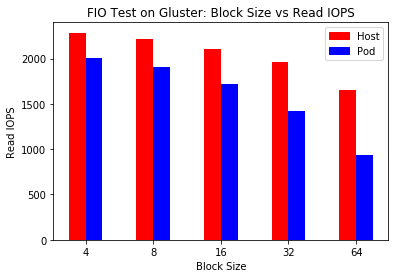

Host gluster write bs medians:  [ 977.5  949.   910.   836.   714. ]
Host gluster write bs means:  [966.75, 944.64646464646466, 907.13861386138615, 836.34653465346537, 711.30693069306926]
Host gluster write bs stds:  [75.643362360690773, 27.630795705872448, 20.492949622180639, 15.643576889329486, 18.588158998023193]
Pod gluster write bs medians:  [ 858.  815.  740.  606.  404.]
Pod gluster write bs means:  [853.63366336633658, 820.48514851485152, 730.44554455445541, 628.90099009900985, 481.88118811881191]
Pod gluster write bs stds:  [23.708929166525245, 21.836300896881127, 62.934584181430793, 52.915494923321845, 91.409565451401832]


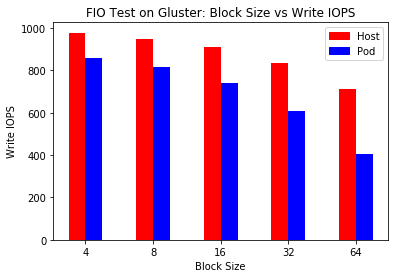

In [86]:
# GLUSTER BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_read_iops)
y_pod = take_median(pod_gluster_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: Block Size vs Read IOPS"

 

# host
host_gluster_bs_read_medians = copy.deepcopy(y_host)
host_gluster_bs_read_means = take_mean(host_gluster_bs_read_iops)
host_gluster_bs_read_stds = take_std(host_gluster_bs_read_iops)
# pod
pod_gluster_bs_read_medians = copy.deepcopy(y_pod)
pod_gluster_bs_read_means = take_mean(pod_gluster_bs_read_iops)
pod_gluster_bs_read_stds = take_std(pod_gluster_bs_read_iops)

print "Host gluster read bs medians: ", y_host
print "Host gluster read bs means: ", host_gluster_bs_read_means
print "Host gluster read bs stds: ", host_gluster_bs_read_stds

print "Pod gluster read bs medians: ", y_pod
print "Pod gluster read bs means: ", pod_gluster_bs_read_means
print "Pod gluster read bs stds: ", pod_gluster_bs_read_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_bs_read" )



# GLUSTER BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_write_iops)
y_pod = take_median(pod_gluster_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: Block Size vs Write IOPS"

# means
host_gluster_bs_write_medians = copy.deepcopy(y_host)
host_gluster_bs_write_means = take_mean(host_gluster_bs_write_iops)
host_gluster_bs_write_stds = take_std(host_gluster_bs_write_iops)
# std
pod_gluster_bs_write_medians = copy.deepcopy(y_pod)
pod_gluster_bs_write_means = take_mean(pod_gluster_bs_write_iops)
pod_gluster_bs_write_stds = take_std(pod_gluster_bs_write_iops)


print "Host gluster write bs medians: ", y_host
print "Host gluster write bs means: ", host_gluster_bs_write_means
print "Host gluster write bs stds: ", host_gluster_bs_write_stds

print "Pod gluster write bs medians: ", y_pod
print "Pod gluster write bs means: ", pod_gluster_bs_write_means
print "Pod gluster write bs stds: ", pod_gluster_bs_write_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_bs_write" )



Host RBD read bs medians:  [ 6863.  6724.  6335.  5653.  4419.]
Host RBD read bs means:  [6883.029702970297, 6694.7920792079212, 6318.5841584158416, 5642.257425742574, 4413.7524752475247]
Host RBD read bs stds:  [147.61989290437754, 190.66030737557355, 192.46433473525377, 214.96804521756329, 282.84570211821222]
Pod RBD read bs medians:  [ 6654.  6424.  6058.  5356.  4165.]
Pod RBD read bs means:  [6665.3168316831679, 6426.5445544554459, 6049.5148514851489, 5333.0099009900987, 4169.9504950495048]
Pod RBD read bs stds:  [107.43516863331439, 112.96670189782817, 188.35618322643779, 224.72312976301581, 262.12582483286417]


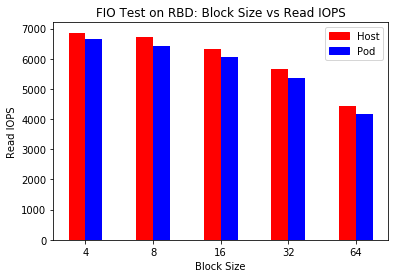

Host RBD write bs medians:  [ 2943.  2879.  2734.  2415.  1909.]
Host RBD write bs means:  [2951.5643564356437, 2866.772277227723, 2727.4752475247524, 2409.8910891089108, 1907.0891089108911]
Host RBD write bs stds:  [63.303827460276672, 81.678660541683357, 83.099200417857489, 91.826881996666344, 122.28501839133172]
Pod RBD write bs medians:  [ 2853.  2751.  2615.  2288.  1800.]
Pod RBD write bs means:  [2858.227722772277, 2751.9306930693069, 2611.3564356435645, 2277.8316831683169, 1801.7326732673268]
Pod RBD write bs stds:  [46.087278627077531, 48.438438509743776, 81.25849039062129, 95.966998175159688, 113.33197455797759]


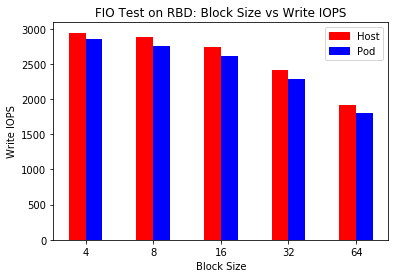

In [101]:
# RBD BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_read_iops)
y_pod = take_median(pod_rbd_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on RBD: Block Size vs Read IOPS"


# host
host_rbd_bs_read_medians = copy.deepcopy(y_host)
host_rbd_bs_read_means = take_mean(host_rbd_bs_read_iops)
host_rbd_bs_read_stds = take_std(host_rbd_bs_read_iops)
# pod
pod_rbd_bs_read_medians = copy.deepcopy(y_pod)
pod_rbd_bs_read_means = take_mean(pod_rbd_bs_read_iops)
pod_rbd_bs_read_stds = take_std(pod_rbd_bs_read_iops)

print "Host RBD read bs medians: ", y_host
print "Host RBD read bs means: ", host_rbd_bs_read_means
print "Host RBD read bs stds: ", host_rbd_bs_read_stds

print "Pod RBD read bs medians: ", y_pod
print "Pod RBD read bs means: ", pod_rbd_bs_read_means
print "Pod RBD read bs stds: ", pod_rbd_bs_read_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_bs_read" )



# RBD BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_write_iops)
y_pod = take_median(pod_rbd_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on RBD: Block Size vs Write IOPS"


# host
host_rbd_bs_write_medians = copy.deepcopy(y_host)
host_rbd_bs_write_means = take_mean(host_rbd_bs_write_iops)
host_rbd_bs_write_stds = take_std(host_rbd_bs_write_iops)
# pod
pod_rbd_bs_write_medians = copy.deepcopy(y_pod)
pod_rbd_bs_write_means = take_mean(pod_rbd_bs_write_iops)
pod_rbd_bs_write_stds = take_std(pod_rbd_bs_write_iops)

print "Host RBD write bs medians: ", y_host
print "Host RBD write bs means: ", host_rbd_bs_write_means
print "Host RBD write bs stds: ", host_rbd_bs_write_stds

print "Pod RBD write bs medians: ", y_pod
print "Pod RBD write bs means: ", pod_rbd_bs_write_means
print "Pod RBD write bs stds: ", pod_rbd_bs_write_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_bs_write" )



Host gluster read bs medians:  [ 2222.   2263.5  2308.   2275.   2271.   2268. ]
Host gluster read bs means:  [2155.872549019608, 2222.9411764705883, 2287.6666666666665, 2248.3861386138615, 2248.6732673267325, 2251.6831683168316]
Host gluster read bs stds:  [2155.872549019608, 2222.9411764705883, 2287.6666666666665, 2248.3861386138615, 2248.6732673267325, 2251.6831683168316]
Pod gluster read bs medians:  [ 2097.  2135.  2075.  2049.  2071.  2091.]
Pod gluster read bs means:  [2106.9405940594061, 2114.7623762376238, 2071.2178217821784, 2037.2871287128712, 2073.8514851485147, 2085.2772277227723]
Pod gluster read bs stds:  [109.99251295691806, 119.10326233694856, 148.37673511695908, 79.765663800025393, 119.1521521798136, 52.605221066008141]


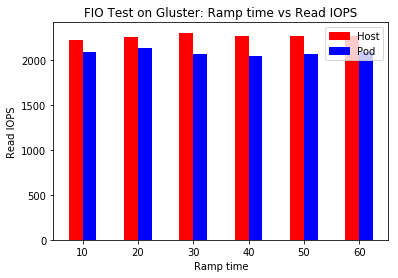

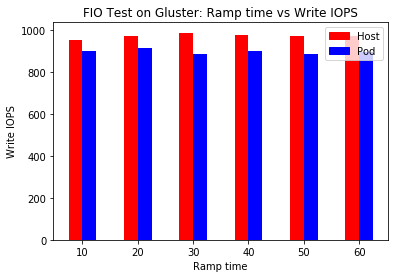

Host gluster write rt medians:  [ 951.   972.   987.5  976.   974.   973. ]
Host gluster write rt means:  [923.0, 954.32352941176475, 979.21568627450984, 972.3564356435644, 964.05940594059405, 965.39603960396039]
Host gluster write rt stds:  [95.486884429429438, 44.855576907449482, 47.418377229074714, 40.724037263730857, 77.918950246829468, 73.508008482395553]
Pod gluster write rt medians:  [ 898.  916.  886.  899.  888.  897.]
Pod gluster write rt means:  [902.16831683168311, 907.39603960396039, 886.16831683168311, 904.17821782178214, 889.06930693069307, 894.03960396039599]
Pod gluster write rt stds:  [46.802527922530231, 51.503932217066826, 64.450774723919963, 41.270274594926946, 51.163542369899361, 22.53882054425921]


In [178]:
# GLUSTER RAMPTIME READ
x_labels = sorted(host_gluster_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_gluster_rt_read_iops)
y_pod = take_median(pod_gluster_rt_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: Ramp time vs Read IOPS"


# host
host_gluster_rt_read_medians = copy.deepcopy(y_host)
host_gluster_rt_read_means = take_mean(host_gluster_rt_read_iops)
host_gluster_rt_read_stds = take_std(host_gluster_rt_read_iops)
# pod
pod_gluster_rt_read_medians = copy.deepcopy(y_pod)
pod_gluster_rt_read_means = take_mean(pod_gluster_rt_read_iops)
pod_gluster_rt_read_stds = take_std(pod_gluster_rt_read_iops)

print "Host gluster read bs medians: ", y_host
print "Host gluster read bs means: ", host_gluster_rt_read_means
print "Host gluster read bs stds: ", host_gluster_rt_read_means

print "Pod gluster read bs medians: ", y_pod
print "Pod gluster read bs means: ", pod_gluster_rt_read_means
print "Pod gluster read bs stds: ", pod_gluster_rt_read_stds

plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_rt_read" )



# GLUSTER RAMPTIME WRITE
x_labels = sorted(host_gluster_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_gluster_rt_write_iops)
y_pod = take_median(pod_gluster_rt_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: Ramp time vs Write IOPS"


plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_rt_write" )


# host
host_gluster_rt_write_medians = copy.deepcopy(y_host)
host_gluster_rt_write_means = take_mean(host_gluster_rt_write_iops)
host_gluster_rt_write_stds = take_std(host_gluster_rt_write_iops)
# pod
pod_gluster_rt_write_medians = copy.deepcopy(y_pod)
pod_gluster_rt_write_means = take_mean(pod_gluster_rt_write_iops)
pod_gluster_rt_write_stds = take_std(pod_gluster_rt_write_iops)

print "Host gluster write rt medians: ", y_host
print "Host gluster write rt means: ", host_gluster_rt_write_means
print "Host gluster write rt stds: ", host_gluster_rt_write_stds

print "Pod gluster write rt medians: ", y_pod
print "Pod gluster write rt means: ", pod_gluster_rt_write_means
print "Pod gluster write rt stds: ", pod_gluster_rt_write_stds

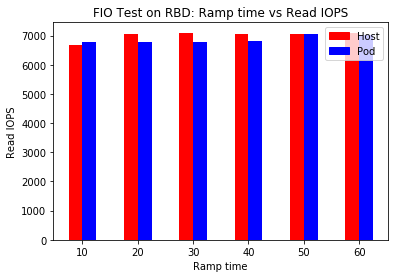

Host RBD read rt medians:  [ 6664.  7053.  7100.  7063.  7057.  7075.]
Host RBD read rt means:  [6668.9306930693074, 7058.4158415841584, 7080.287128712871, 7054.4554455445541, 7044.742574257426, 7056.4059405940598]
Host RBD read rt stds:  [200.73051031372083, 92.736960848736317, 97.09109090611696, 81.152042213948988, 107.76989177674447, 96.671248371680008]
Pod RBD read rt medians:  [ 6775.5  6781.   6767.   6833.   7059.   7035. ]
Pod RBD read rt means:  [6770.5699999999997, 6772.8118811881186, 6762.1089108910892, 6848.8514851485152, 7053.0900000000001, 7030.0200000000004]
Pod RBD read rt stds:  [239.45576856697355, 124.29513845278015, 127.21836695577038, 133.08631801334346, 101.85755691160082, 94.626632614713714]


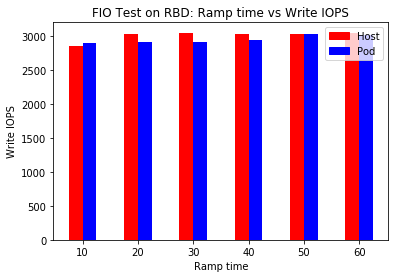

Host RBD write rt medians:  [ 2852.  3024.  3044.  3029.  3026.  3034.]
Host RBD write rt means:  [2857.9306930693069, 3026.7227722772277, 3036.128712871287, 3025.128712871287, 3020.9207920792078, 3025.90099009901]
Host RBD write rt stds:  [85.102647097984061, 39.730059152174327, 41.641958886770183, 34.806868380566954, 46.213384364511924, 41.470377105079784]
Pod RBD write rt medians:  [ 2899.5  2908.   2902.   2930.   3027.5  3017. ]
Pod RBD write rt means:  [2900.2399999999998, 2904.2772277227723, 2899.6930693069307, 2936.90099009901, 3024.5300000000002, 3014.5900000000001]
Pod RBD write rt stds:  [100.48005971335807, 53.322690136597458, 54.541607802378394, 57.049831431358641, 43.665422246899205, 40.574646024333965]


In [179]:
# RBD RAMPTIME READ
x_labels = sorted(host_rbd_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_rbd_rt_read_iops)
y_pod = take_median(pod_rbd_rt_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on RBD: Ramp time vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_rt_read" )
# host
host_rbd_rt_read_medians = take_median(host_rbd_rt_read_iops)
host_rbd_rt_read_means = take_mean(host_rbd_rt_read_iops)
host_rbd_rt_read_stds = take_std(host_rbd_rt_read_iops)
# pod
pod_rbd_rt_read_medians = take_median(pod_rbd_rt_read_iops)
pod_rbd_rt_read_means = take_mean(pod_rbd_rt_read_iops)
pod_rbd_rt_read_stds = take_std(pod_rbd_rt_read_iops)

print "Host RBD read rt medians: ", y_host
print "Host RBD read rt means: ", host_rbd_rt_read_means
print "Host RBD read rt stds: ", host_rbd_rt_read_stds

print "Pod RBD read rt medians: ", y_pod
print "Pod RBD read rt means: ", pod_rbd_rt_read_means
print "Pod RBD read rt stds: ", pod_rbd_rt_read_stds


# RBD RAMPTIME WRITE
x_labels = sorted(host_rbd_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_rbd_rt_write_iops)
y_pod = take_median(pod_rbd_rt_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on RBD: Ramp time vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_rt_write" )

# host
host_rbd_rt_write_medians = take_median(host_rbd_rt_write_iops)
host_rbd_rt_write_means = take_mean(host_rbd_rt_write_iops)
host_rbd_rt_write_stds = take_std(host_rbd_rt_write_iops)
# pod
pod_rbd_rt_write_medians = take_median(pod_rbd_rt_write_iops)
pod_rbd_rt_write_means = take_mean(pod_rbd_rt_write_iops)
pod_rbd_rt_write_stds = take_std(pod_rbd_rt_write_iops)

print "Host RBD write rt medians: ", y_host
print "Host RBD write rt means: ", host_rbd_rt_write_means
print "Host RBD write rt stds: ", host_rbd_rt_write_stds

print "Pod RBD write rt medians: ", y_pod
print "Pod RBD write rt means: ", pod_rbd_rt_write_means
print "Pod RBD write rt stds: ", pod_rbd_rt_write_stds

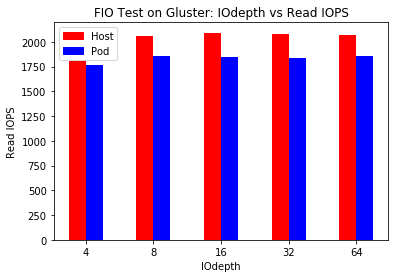

Host gluster read depth medians:  [ 1811.  2059.  2092.  2078.  2069.]
Host gluster read depth means:  [1845.920792079208, 2044.8712871287128, 2099.6930693069307, 2067.5049504950493, 2063.2178217821784]
Host gluster read depth stds:  [145.74368407885657, 208.19372468293369, 65.255285825771367, 145.55735311140938, 149.63299021803982]
Pod gluster read depth medians:  [ 1762.  1852.  1850.  1840.  1853.]
Pod gluster read depth means:  [1826.7920792079208, 1970.3366336633662, 2036.2079207920792, 2100.7128712871286, 2130.8118811881186]
Pod gluster read depth stds:  [668.50550501420014, 1215.6318022974656, 2077.1491759965629, 2668.4220365380465, 2896.6515927463256]


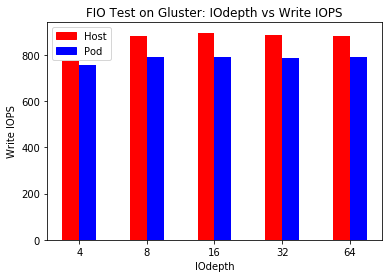

Host gluster write depth medians:  [ 775.  883.  897.  888.  883.]
Host gluster write depth means:  [790.20792079207922, 874.73267326732673, 898.85148514851483, 884.78217821782175, 882.52475247524751]
Host gluster write depth stds:  [62.242629184154019, 89.607161476654014, 29.035446462206853, 62.904863568740858, 64.882924886062398]
Pod gluster write depth medians:  [ 755.  793.  792.  788.  793.]
Pod gluster write depth means:  [782.60396039603961, 843.31683168316829, 871.73267326732673, 899.24752475247521, 912.18811881188117]
Pod gluster write depth stds:  [286.79267977484028, 521.45253964558765, 890.94320796757131, 1144.5294714461156, 1242.3893118644714]


In [83]:
# GLUSTER IODEPTH READ
x_labels = sorted(host_gluster_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_gluster_depth_read_iops)
y_pod = take_median(pod_gluster_depth_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: IOdepth vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_iodepth_read" )
# host
host_gluster_depth_read_medians = y_host
host_gluster_depth_read_means = take_mean(host_gluster_depth_read_iops)
host_gluster_depth_read_stds = take_std(host_gluster_depth_read_iops)
# pod
pod_gluster_depth_read_medians = y_pod
pod_gluster_depth_read_means = take_mean(pod_gluster_depth_read_iops)
pod_gluster_depth_read_stds = take_std(pod_gluster_depth_read_iops)

print "Host gluster read depth medians: ", y_host
print "Host gluster read depth means: ", host_gluster_depth_read_means
print "Host gluster read depth stds: ", host_gluster_depth_read_stds

print "Pod gluster read depth medians: ", y_pod
print "Pod gluster read depth means: ", pod_gluster_depth_read_means
print "Pod gluster read depth stds: ", pod_gluster_depth_read_stds



# GLUSTER IODEPTH WRITE
x_labels = sorted(host_gluster_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_gluster_depth_write_iops)
y_pod = take_median(pod_gluster_depth_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: IOdepth vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_iodepth_write" )

# host
host_gluster_depth_write_medians = copy.deepcopy(y_host)
host_gluster_depth_write_means = take_mean(host_gluster_depth_write_iops)
host_gluster_depth_write_stds = take_std(host_gluster_depth_write_iops)
# pod
pod_gluster_depth_write_medians = copy.deepcopy(y_pod)
pod_gluster_depth_write_means = take_mean(pod_gluster_depth_write_iops)
pod_gluster_depth_write_stds = take_std(pod_gluster_depth_write_iops)

print "Host gluster write depth medians: ", y_host
print "Host gluster write depth means: ", host_gluster_depth_write_means
print "Host gluster write depth stds: ", host_gluster_depth_write_stds

print "Pod gluster write depth medians: ", y_pod
print "Pod gluster write depth means: ", pod_gluster_depth_write_means
print "Pod gluster write depth stds: ", pod_gluster_depth_write_stds

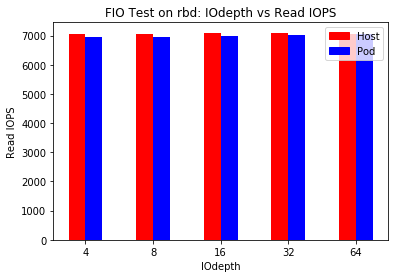

Host rbd read depth medians:  [ 7041.   7035.5  7094.   7096.5  7066. ]
Host rbd read depth means:  [7013.1499999999996, 7030.6199999999999, 7090.21, 7093.71, 7060.7700000000004]
Host rbd read depth stds:  [165.03510990089353, 121.45705249181704, 83.340061795033478, 81.108482293777371, 88.915336697332492]
Pod rbd read depth medians:  [ 6958.  6965.  6988.  7017.  7052.]
Pod rbd read depth means:  [6965.257425742574, 6922.9306930693074, 6965.8415841584156, 6972.3960396039602, 6999.5742574257429]
Pod rbd read depth stds:  [172.94082164542007, 217.13956170158238, 157.55406004008341, 181.38641424165144, 170.79478430918451]


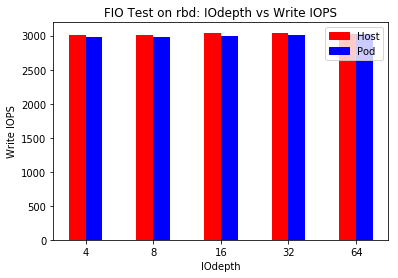

Host rbd write depth medians:  [ 3011.5  3014.5  3042.   3043.   3030.5]
Host rbd write depth means:  [2998.8600000000001, 3012.0799999999999, 3040.4099999999999, 3041.9099999999999, 3027.7800000000002]
Host rbd write depth stds:  [70.534249836515599, 51.802061735031359, 35.736842333927598, 34.749415822427864, 38.167415422058646]
Pod rbd write depth medians:  [ 2976.  2981.  2997.  3009.  3024.]
Pod rbd write depth means:  [2977.9504950495048, 2965.3366336633662, 2987.0891089108909, 2989.871287128713, 3001.5346534653463]
Pod rbd write depth stds:  [74.160299517379244, 94.216232990736827, 67.591097165511698, 77.820263003840225, 73.268469351539878]


In [58]:
# rbd IODEPTH READ
x_labels = sorted(host_rbd_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_rbd_depth_read_iops)
y_pod = take_median(pod_rbd_depth_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on rbd: IOdepth vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_iodepth_read" )

# host
host_rbd_depth_read_medians = copy.deepcopy(y_host)
host_rbd_depth_read_means = take_mean(host_rbd_depth_read_iops)
host_rbd_depth_read_stds = take_std(host_rbd_depth_read_iops)
# pod
pod_rbd_depth_read_medians = copy.deepcopy(y_pod)
pod_rbd_depth_read_means = take_mean(pod_rbd_depth_read_iops)
pod_rbd_depth_read_stds = take_std(pod_rbd_depth_read_iops)

print "Host rbd read depth medians: ", host_rbd_depth_read_medians
print "Host rbd read depth means: ", host_rbd_depth_read_means
print "Host rbd read depth stds: ", host_rbd_depth_read_stds

print "Pod rbd read depth medians: ", pod_rbd_depth_read_medians
print "Pod rbd read depth means: ", pod_rbd_depth_read_means
print "Pod rbd read depth stds: ", pod_rbd_depth_read_stds


# rbd IODEPTH WRITE
x_labels = sorted(host_rbd_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_rbd_depth_write_iops)
y_pod = take_median(pod_rbd_depth_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on rbd: IOdepth vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_iodepth_write" )

# host
host_rbd_depth_write_medians = copy.deepcopy(y_host)
host_rbd_depth_write_means = take_mean(host_rbd_depth_write_iops)
host_rbd_depth_write_stds = take_std(host_rbd_depth_write_iops)
# pod
pod_rbd_depth_write_medians = copy.deepcopy(y_pod)
pod_rbd_depth_write_means = take_mean(pod_rbd_depth_write_iops)
pod_rbd_depth_write_stds = take_std(pod_rbd_depth_write_iops)

print "Host rbd write depth medians: ", y_host
print "Host rbd write depth means: ", host_rbd_depth_write_means
print "Host rbd write depth stds: ", host_rbd_depth_write_stds

print "Pod rbd write depth medians: ", y_pod
print "Pod rbd write depth means: ", pod_rbd_depth_write_means
print "Pod rbd write depth stds: ", pod_rbd_depth_write_stds

In [20]:
import pandas as pd
import copy

In [140]:
def get_matrix(labels,medians,means,stds):
    d=3
    matrix = np.array((labels,
                       np.floor(medians),
                       np.ceil(means),
                       np.round(stds,decimals=d)
                     )).transpose()
    return matrix

def get_table1(matrix):
    return pd.DataFrame(matrix, columns=['','Mediana','Media','Desviacion Estandar']).to_latex(index=False)

def print_table1(table1):
    print "\\begin{table}[h]"
    print table1
    print "\\end{table}"


In [141]:
# GLUSTER BS
print ""

labels = [4, 8, 16, 32, 64 ]

print "gluster bs READ"
host_gluster_bs_read_matrix = get_matrix(labels, 
                                        host_gluster_bs_read_medians,
                                       host_gluster_bs_read_means,
                                       host_gluster_bs_read_stds)
pod_gluster_bs_read_matrix = get_matrix(labels,
                                       pod_gluster_bs_read_medians,
                                      pod_gluster_bs_read_means,
                                      pod_gluster_bs_read_stds)


print "\\begin{itemize}"
print "\\item HOST READ"
print get_table1(host_gluster_bs_read_matrix)
print "\\item POD READ"
print get_table1(pod_gluster_bs_read_matrix)


# gluster bs WRITE
host_gluster_bs_write_matrix = get_matrix(labels, 
                                        host_gluster_bs_write_medians,
                                       host_gluster_bs_write_means,
                                       host_gluster_bs_write_stds)
pod_gluster_bs_write_matrix = get_matrix(labels,
                                       pod_gluster_bs_write_medians,
                                      pod_gluster_bs_write_means,
                                      pod_gluster_bs_write_stds)


print "\\item HOST WRITE"
print get_table1(host_gluster_bs_write_matrix)
print "\\item POD WRITE"
print get_table1(pod_gluster_bs_write_matrix)
print "\\end{itemize}"


print_table1(get_table1(pod_gluster_bs_write_matrix))


gluster bs READ
\begin{itemize}
\item HOST READ
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
  4.0 &   2285.0 &  2257.0 &              176.267 \\
  8.0 &   2217.0 &  2207.0 &               64.517 \\
 16.0 &   2108.0 &  2103.0 &               47.430 \\
 32.0 &   1958.0 &  1959.0 &               36.521 \\
 64.0 &   1652.0 &  1647.0 &               43.156 \\
\bottomrule
\end{tabular}

\item POD READ
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
  4.0 &   2009.0 &  1999.0 &               57.557 \\
  8.0 &   1905.0 &  1917.0 &               51.123 \\
 16.0 &   1715.0 &  1693.0 &              147.493 \\
 32.0 &   1419.0 &  1473.0 &              123.934 \\
 64.0 &    936.0 &  1116.0 &              211.561 \\
\bottomrule
\end{tabular}

\item HOST WRITE
\begin{tabular}{rrrr}
\toprule
      &  Mediana &  Media &  Desviacion Estandar \\
\midrule
  4.0 &    977.0 &  967.0 &               75.643 \\
  8.0

In [102]:
# RBD BS
print ""

labels = [4, 8, 16, 32, 64 ]

print "rbd bs READ"
host_rbd_bs_read_matrix = get_matrix(labels, 
                                        host_rbd_bs_read_medians,
                                       host_rbd_bs_read_means,
                                       host_rbd_bs_read_stds)
pod_rbd_bs_read_matrix = get_matrix(labels,
                                       pod_rbd_bs_read_medians,
                                      pod_rbd_bs_read_means,
                                      pod_rbd_bs_read_stds)


print "################ HOST ######################"
print get_table1(host_rbd_bs_read_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_bs_read_matrix)


# rbd bs WRITE
host_rbd_bs_write_matrix = get_matrix(labels, 
                                        host_rbd_bs_write_medians,
                                       host_rbd_bs_write_means,
                                       host_rbd_bs_write_stds)
pod_rbd_bs_write_matrix = get_matrix(labels,
                                       pod_rbd_bs_write_medians,
                                      pod_rbd_bs_write_means,
                                      pod_rbd_bs_write_stds)

print "rbd bs WRITE"
print "############### HOST #######################"
print get_table1(host_rbd_bs_write_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_bs_write_matrix)



rbd bs READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   6863.0 &  6884.0 &                147.620 \\
  8.0 &   6724.0 &  6695.0 &                190.660 \\
 16.0 &   6335.0 &  6319.0 &                192.464 \\
 32.0 &   5653.0 &  5643.0 &                214.968 \\
 64.0 &   4419.0 &  4414.0 &                282.846 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   6654.0 &  6666.0 &                107.435 \\
  8.0 &   6424.0 &  6427.0 &                112.967 \\
 16.0 &   6058.0 &  6050.0 &                188.356 \\
 32.0 &   5356.0 &  5334.0 &                224.723 \\
 64.0 &   4165.0 &  4170.0 &                262.126 \\
\bottomrule
\end{tabular}

rbd bs WRITE
############### HOST #######################
\begin{tabular}{rrrr

In [92]:
# GLUSTER RT

labels = [10, 20, 30, 40, 50, 60]

print "gluster rt READ"
host_gluster_rt_read_matrix = get_matrix(labels, 
                                        host_gluster_rt_read_medians,
                                       host_gluster_rt_read_means,
                                       host_gluster_rt_read_stds)
pod_gluster_rt_read_matrix = get_matrix(labels,
                                       pod_gluster_rt_read_medians,
                                      pod_gluster_rt_read_means,
                                      pod_gluster_rt_read_stds)


print "################ HOST ######################"
print get_table1(host_gluster_rt_read_matrix)
print "################ POD ######################"
print get_table1(pod_gluster_rt_read_matrix)


# gluster rt WRITE
host_gluster_rt_write_matrix = get_matrix(labels, 
                                        host_gluster_rt_write_medians,
                                       host_gluster_rt_write_means,
                                       host_gluster_rt_write_stds)
pod_gluster_rt_write_matrix = get_matrix(labels,
                                       pod_gluster_rt_write_medians,
                                      pod_gluster_rt_write_means,
                                      pod_gluster_rt_write_stds)

print "gluster rt WRITE"
print "############### HOST #######################"
print get_table1(host_gluster_rt_write_matrix)
print "################ POD ######################"
print get_table1(pod_gluster_rt_write_matrix)

gluster rt READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
 10.0 &   2222.0 &  2156.0 &                223.547 \\
 20.0 &   2263.0 &  2223.0 &                103.811 \\
 30.0 &   2308.0 &  2288.0 &                111.268 \\
 40.0 &   2275.0 &  2249.0 &                139.216 \\
 50.0 &   2271.0 &  2249.0 &                181.954 \\
 60.0 &   2268.0 &  2252.0 &                171.671 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
 10.0 &   2097.0 &  2107.0 &                109.993 \\
 20.0 &   2135.0 &  2115.0 &                119.103 \\
 30.0 &   2075.0 &  2072.0 &                148.377 \\
 40.0 &   2049.0 &  2038.0 &                 79.766 \\
 50.0 &   2071.0 &  2074.0 &                119.152 \\
 60.0 &   2091.0 &  2086.0 &                 52

In [180]:
# RBD RT
print ""

labels = [10, 20, 30, 40, 50, 60]

print "rbd rt READ"
host_rbd_rt_read_matrix = get_matrix(labels, 
                                        host_rbd_rt_read_medians,
                                       host_rbd_rt_read_means,
                                       host_rbd_rt_read_stds)
pod_rbd_rt_read_matrix = get_matrix(labels,
                                       pod_rbd_rt_read_medians,
                                      pod_rbd_rt_read_means,
                                      pod_rbd_rt_read_stds)


print "################ HOST ######################"
print get_table1(host_rbd_rt_read_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_rt_read_matrix)


# rbd rt WRITE
host_rbd_rt_write_matrix = get_matrix(labels, 
                                        host_rbd_rt_write_medians,
                                       host_rbd_rt_write_means,
                                       host_rbd_rt_write_stds)
pod_rbd_rt_write_matrix = get_matrix(labels,
                                       pod_rbd_rt_write_medians,
                                      pod_rbd_rt_write_means,
                                      pod_rbd_rt_write_stds)

print "rbd rt WRITE"
print "############### HOST #######################"
print get_table1(host_rbd_rt_write_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_rt_write_matrix)



rbd rt READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
 10.0 &   6664.0 &  6669.0 &              200.731 \\
 20.0 &   7053.0 &  7059.0 &               92.737 \\
 30.0 &   7100.0 &  7081.0 &               97.091 \\
 40.0 &   7063.0 &  7055.0 &               81.152 \\
 50.0 &   7057.0 &  7045.0 &              107.770 \\
 60.0 &   7075.0 &  7057.0 &               96.671 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
 10.0 &   6775.0 &  6771.0 &              239.456 \\
 20.0 &   6781.0 &  6773.0 &              124.295 \\
 30.0 &   6767.0 &  6763.0 &              127.218 \\
 40.0 &   6833.0 &  6849.0 &              133.086 \\
 50.0 &   7059.0 &  7054.0 &              101.858 \\
 60.0 &   7035.0 &  7031.0 &               94.627 \\
\bottomrule
\end{tabular}

rbd rt WRITE
#########

In [84]:
# GLUSTER IODEPTH

print ""


labels = [4, 8, 16, 32, 64]

print "gluster IODEPTH READ"
host_gluster_depth_read_matrix = get_matrix(labels, 
                                        host_gluster_depth_read_medians,
                                       host_gluster_depth_read_means,
                                       host_gluster_depth_read_stds)
pod_gluster_depth_read_matrix = get_matrix(labels,
                                       pod_gluster_depth_read_medians,
                                      pod_gluster_depth_read_means,
                                      pod_gluster_depth_read_stds)


print "######################################"
print get_table1(host_gluster_depth_read_matrix)
print "######################################"
print get_table1(pod_gluster_depth_read_matrix)


# gluster IODEPTH WRITE
host_gluster_depth_write_matrix = get_matrix(labels, 
                                        host_gluster_depth_write_medians,
                                       host_gluster_depth_write_means,
                                       host_gluster_depth_write_stds)
pod_gluster_depth_write_matrix = get_matrix(labels,
                                       pod_gluster_depth_write_medians,
                                      pod_gluster_depth_write_means,
                                      pod_gluster_depth_write_stds)

print "gluster IODEPTH WRITE"
print "######################################"
print get_table1(host_gluster_depth_write_matrix)
print "######################################"
print get_table1(pod_gluster_depth_write_matrix)



gluster IODEPTH READ
######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   1811.0 &  1846.0 &                145.744 \\
  8.0 &   2059.0 &  2045.0 &                208.194 \\
 16.0 &   2092.0 &  2100.0 &                 65.255 \\
 32.0 &   2078.0 &  2068.0 &                145.557 \\
 64.0 &   2069.0 &  2064.0 &                149.633 \\
\bottomrule
\end{tabular}

######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   1762.0 &  1827.0 &                668.506 \\
  8.0 &   1852.0 &  1971.0 &               1215.632 \\
 16.0 &   1850.0 &  2037.0 &               2077.149 \\
 32.0 &   1840.0 &  2101.0 &               2668.422 \\
 64.0 &   1853.0 &  2131.0 &               2896.652 \\
\bottomrule
\end{tabular}

gluster IODEPTH WRITE
######################################
\begin{tabular}{rrr

In [81]:
#### Pandas tables of results

#RBD IODEPTH READ
print "Host rbd read depth medians: ", host_rbd_depth_read_medians
print "Host rbd read depth means: ", host_rbd_depth_read_means
print "Host rbd read depth stds: ", host_rbd_depth_read_stds

print "Pod rbd read depth medians: ", pod_rbd_depth_read_medians
print "Pod rbd read depth means: ", pod_rbd_depth_read_means
print "Pod rbd read depth stds: ", pod_rbd_depth_read_stds



print ""


labels = [4, 8, 16, 32, 64]

print "RBD IODEPTH READ"
host_rbd_depth_read_matrix = get_matrix(labels, 
                                        host_rbd_depth_read_medians,
                                       host_rbd_depth_read_means,
                                       host_rbd_depth_read_stds)
pod_rbd_depth_read_matrix = get_matrix(labels,
                                       pod_rbd_depth_read_medians,
                                      pod_rbd_depth_read_means,
                                      pod_rbd_depth_read_stds)


print "######################################"
print get_table1(host_rbd_depth_read_matrix)
print "######################################"
print get_table1(pod_rbd_depth_read_matrix)


# RBD IODEPTH WRITE
host_rbd_depth_write_matrix = get_matrix(labels, 
                                        host_rbd_depth_write_medians,
                                       host_rbd_depth_write_means,
                                       host_rbd_depth_write_stds)
pod_rbd_depth_write_matrix = get_matrix(labels,
                                       pod_rbd_depth_write_medians,
                                      pod_rbd_depth_write_means,
                                      pod_rbd_depth_write_stds)

print "RBD IODEPTH WRITE"
print "######################################"
print get_table1(host_rbd_depth_write_matrix)
print "######################################"
print get_table1(pod_rbd_depth_write_matrix)







Host rbd read depth medians:  [ 7041.   7035.5  7094.   7096.5  7066. ]
Host rbd read depth means:  [7013.1499999999996, 7030.6199999999999, 7090.21, 7093.71, 7060.7700000000004]
Host rbd read depth stds:  [165.03510990089353, 121.45705249181704, 83.340061795033478, 81.108482293777371, 88.915336697332492]
Pod rbd read depth medians:  [ 6958.  6965.  6988.  7017.  7052.]
Pod rbd read depth means:  [6965.257425742574, 6922.9306930693074, 6965.8415841584156, 6972.3960396039602, 6999.5742574257429]
Pod rbd read depth stds:  [172.94082164542007, 217.13956170158238, 157.55406004008341, 181.38641424165144, 170.79478430918451]

RBD IODEPTH READ
######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   7041.0 &  7014.0 &                165.035 \\
  8.0 &   7035.0 &  7031.0 &                121.457 \\
 16.0 &   7094.0 &  7091.0 &                 83.340 \\
 32.0 &   7096.0 &  7094.0 &               

In [104]:
############### TABLAS IOPS #####################################

In [29]:

testo_1 = copy.deepcopy(np.floor(host_rbd_depth_write_medians))
testo_2 = copy.deepcopy(np.ceil(host_rbd_depth_write_means))
testo_3 = copy.deepcopy(host_rbd_depth_write_stds)
print np.array((testo_1,testo_2,testo_3)).transpose()
testo = pd.DataFrame(np.array((testo_1,testo_2,testo_3)).transpose())
print testo.to_latex()

[[ 3011.          2999.            70.53424984]
 [ 3014.          3013.            51.80206174]
 [ 3042.          3041.            35.73684233]
 [ 3043.          3042.            34.74941582]
 [ 3030.          3028.            38.16741542]]
\begin{tabular}{lrrr}
\toprule
{} &       0 &       1 &          2 \\
\midrule
0 &  3011.0 &  2999.0 &  70.534250 \\
1 &  3014.0 &  3013.0 &  51.802062 \\
2 &  3042.0 &  3041.0 &  35.736842 \\
3 &  3043.0 &  3042.0 &  34.749416 \\
4 &  3030.0 &  3028.0 &  38.167415 \\
\bottomrule
\end{tabular}



In [36]:
ex= pd.DataFrame(host_rbd_depth_read_iops)
print ex.to_latex(index=False)

\begin{tabular}{rrrrr}
\toprule
   4  &    8  &    16 &    32 &    64 \\
\midrule
 6823 &  6963 &  7256 &  7099 &  7073 \\
 6839 &  6982 &  7093 &  7008 &  7139 \\
 6705 &  6939 &  7134 &  7029 &  6880 \\
 6698 &  6995 &  7070 &  7126 &  7010 \\
 7029 &  6995 &  7084 &  7016 &  7178 \\
 7283 &  7117 &  6976 &  6958 &  7020 \\
 7244 &  6857 &  7136 &  7075 &  7069 \\
 7102 &  7043 &  7086 &  7078 &  7247 \\
 7114 &  7093 &  7045 &  7093 &  7071 \\
 7214 &  7055 &  7101 &  7021 &  7083 \\
 6999 &  7076 &  7000 &  7156 &  7046 \\
 7134 &  7160 &  6893 &  7215 &  7089 \\
 6942 &  6931 &  7123 &  7113 &  7013 \\
 6987 &  7109 &  6969 &  7012 &  7046 \\
 6776 &  7106 &  7073 &  7022 &  7127 \\
 6895 &  6959 &  7119 &  7067 &  7172 \\
 6951 &  6965 &  6823 &  7106 &  7084 \\
 7147 &  7020 &  7032 &  7039 &  7093 \\
 7105 &  7058 &  7115 &  7204 &  7200 \\
 7203 &  7231 &  7077 &  7020 &  7050 \\
 7193 &  7111 &  7021 &  7127 &  7071 \\
 7013 &  7008 &  7072 &  7188 &  7004 \\
 7097 &  6950 & 

In [164]:
def create_dataframe_rt(dfx):
    df = dfx.copy()
    df_merged = []
    for column in df.columns:
        if column != "type":
            iops = df.loc[:,column]
            t = df.loc[:,"type"]
            df_column = pd.DataFrame({"IOPS":iops, "type":t, "Ramp_Time": column}) 
            df_merged.append(df_column)
    df_merged = pd.concat(df_merged)
    return df_merged

In [129]:
def create_dataframe(dfx):
    df = dfx.copy()
    df_merged = []
    for column in df.columns:
        if column != "type":
            iops = df.loc[:,column]
            t = df.loc[:,"type"]
            df_column = pd.DataFrame({"IOPS":iops, "type":t, "Block_Size": column}) 
            df_merged.append(df_column)
    df_merged = pd.concat(df_merged)
    return df_merged

    

In [144]:
def create_boxplot(df, x, y, hue, title):
    
    ax = sns.boxplot(data=df,
                     x=x, y=y, hue=hue, 
                     palette="Set3", linewidth=2.0).set_title(title)
    fig = ax.get_figure()
    return fig
    #fig.savefig('boxplot_gluster_bs_read.png')
        
    

In [142]:
def concat_df(df1, df2, var, metric):
    
    df_final_form = pd.concat([df1, df2])
    df_final_form["type"] = df_final_form.type.astype("category")
    df_final_form[var] = df_final_form.var.astype("int")
    df_final_form[metric] = df_final_form.metric.astype("int")

In [ ]:
### tablas host

In [21]:
df_host_gluster_bs_read = pd.DataFrame(host_gluster_bs_read_iops)
#print df_host_gluster_bs_read.to_latex('tables/host_gluster_bs_read_longtable.txt',longtable=True, index=False)

df_host_gluster_bs_write = pd.DataFrame(host_gluster_bs_write_iops)
#print df_host_gluster_bs_write.to_latex('tables/host_gluster_bs_write_longtable.txt',longtable=True, index=False)

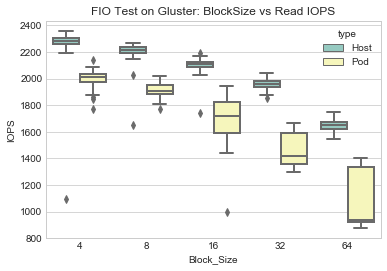

In [141]:
# BOXPLOT host_gluster_bs_read

parte1 = [df_host_gluster_bs_read[4],df_pod_gluster_bs_read[4]]
parte2 = [df_host_gluster_bs_read[8],df_pod_gluster_bs_read[8]]
#plt.boxplot(parte1,positions=[0.5,0.75])



sns.set_style("whitegrid")

df_host_gluster_bs_read["type"] = "Host"
df_pod_gluster_bs_read["type"] = "Pod"

#sns.boxplot(data=pd_all, orient="h", palette="Set3")
#sns.boxplot(data=df_pod_rbd_bs_read, orient="h", palette="Set3")


new_df_host_gluster_bs_read = create_dataframe(df_host_gluster_bs_read)
new_df_pod_gluster_bs_read = create_dataframe(df_pod_gluster_bs_read)
#print new_df_host_rbd_bs_read
#print new_df_pod_rbd_bs_read


#print new_df_pod_rbd_bs_read
df_final_form = pd.concat([new_df_host_gluster_bs_read, new_df_pod_gluster_bs_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Block_Size"] = df_final_form.Block_Size.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

#print df_final_form

ax = sns.boxplot(data=df_final_form,x="Block_Size", y="IOPS", hue="type", palette="Set3", linewidth=2.0).set_title('FIO Test on Gluster: BlockSize vs Read IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_bs_read.png')



In [ ]:
sns.set_style("whitegrid")

df_host_gluster_bs_read["type"] = "Host"
df_pod_gluster_bs_read["type"] = "Pod"

new_df_test1 = create_dataframe(df_host_gluster_bs_read)
new_df_test2 = create_dataframe(df_pod_gluster_bs_read)

df_ff = concat_df(new_df_test1, new_df_test2, "Block", "iops")



In [106]:
# TABLAS 
df_host_rbd_bs_read = pd.DataFrame(host_rbd_bs_read_iops)
#print df_host_rbd_bs_read.to_latex('tables/host_rbd_bs_read_longtable.txt',longtable=True,index=False)

df_host_rbd_bs_write = pd.DataFrame(host_rbd_bs_write_iops)
#print df_host_rbd_bs_write.to_latex('tables/host_rbd_bs_write_longtable.txt',longtable=True,index=False)

     Block_Size  IOPS type
0             4  6501  Pod
1             4  6832  Pod
2             4  6951  Pod
3             4  6538  Pod
4             4  6718  Pod
5             4  6654  Pod
6             4  6501  Pod
7             4  6621  Pod
8             4  6599  Pod
9             4  6602  Pod
10            4  6812  Pod
11            4  6648  Pod
12            4  6673  Pod
13            4  6740  Pod
14            4  6576  Pod
15            4  6806  Pod
16            4  6440  Pod
17            4  6691  Pod
18            4  6648  Pod
19            4  6639  Pod
20            4  6607  Pod
21            4  6595  Pod
22            4  6676  Pod
23            4  6723  Pod
24            4  6888  Pod
25            4  6709  Pod
26            4  6668  Pod
27            4  6648  Pod
28            4  6635  Pod
29            4  6581  Pod
..          ...   ...  ...
71           64  3967  Pod
72           64  4336  Pod
73           64  4095  Pod
74           64  4165  Pod
75           64  4053  Pod
7

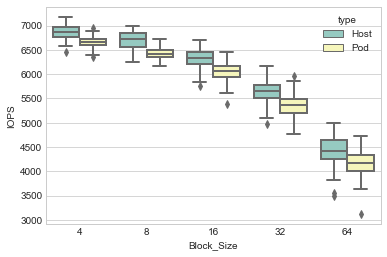

In [131]:
import seaborn as sns
sns.set_style("whitegrid")

df_host_rbd_bs_read["type"] = "Host"
df_pod_rbd_bs_read["type"] = "Pod"

#sns.boxplot(data=pd_all, orient="h", palette="Set3")
#sns.boxplot(data=df_pod_rbd_bs_read, orient="h", palette="Set3")


new_df_host_rbd_bs_read = create_dataframe(df_host_rbd_bs_read)
new_df_pod_rbd_bs_read = create_dataframe(df_pod_rbd_bs_read)
#print new_df_host_rbd_bs_read
#print new_df_pod_rbd_bs_read


print new_df_pod_rbd_bs_read
df_final_form = pd.concat([new_df_host_rbd_bs_read, new_df_pod_rbd_bs_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Block_Size"] = df_final_form.Block_Size.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

#print df_final_form

ax = sns.boxplot(data=df_final_form,x="Block_Size", y="IOPS", hue="type", palette="Set3", linewidth=2.0)
fig = ax.get_figure()
fig.savefig('boxplot_host_rbd_bs_read.png')

#sns.boxplot(data=df_final_form,x="variable", y="iops", hue="type")










In [177]:

# TABLAS gluster rt
df_host_gluster_rt_read = pd.DataFrame(host_gluster_rt_read_iops)
#print df_host_gluster_rt_read.to_latex('tables/host_gluster_rt_read_longtable.txt',longtable=True,index=False)
#print df_host_gluster_rt_read.to_latex(index=False)

df_host_gluster_rt_write = pd.DataFrame(host_gluster_rt_write_iops)
#print df_host_gluster_rt_write.to_latex('tables/host_gluster_rt_write_longtable.txt',longtable=True,index=False)
#print df_host_gluster_rt_write.to_latex(index=False)

In [178]:
# TABLAS RBD RT
df_host_rbd_rt_read = pd.DataFrame(host_rbd_rt_read_iops)
#print df_host_rbd_rt_read.to_latex('tables/host_rbd_rt_read_longtable.txt',longtable=True, index=False)
#print df_host_rbd_rt_read.to_latex(index=False)

df_host_rbd_rt_write = pd.DataFrame(host_rbd_rt_write_iops)
#print df_host_rbd_rt_write.to_latex('tables/host_rbd_rt_write_longtable.txt',longtable=True, index=False)
#print df_host_rbd_rt_write.to_latex(index=False)

In [198]:
# TABLAS gluster DEPTH
df_host_gluster_depth_read = pd.DataFrame(host_gluster_depth_read_iops)
#print df_host_gluster_depth_read.to_latex('tables/host_gluster_depth_read_table.txt',index=False)
#print df_host_gluster_depth_read.to_latex(index=False)

df_host_gluster_depth_read = pd.DataFrame(host_gluster_depth_read_iops)
#print df_host_gluster_depth_read.to_latex('tables/host_gluster_depth_read_longtable.txt',longtable=True, index=False)
#print df_host_gluster_depth_read.to_latex(index=False)

df_host_gluster_depth_write = pd.DataFrame(host_gluster_depth_write_iops)
#print df_host_gluster_depth_write.to_latex('tables/host_gluster_depth_write_longtable.txt',longtable=True,index=False)
#print df_host_gluster_depth_write.to_latex(index=False)

In [171]:
# TABLAS RBD DEPTH
df_host_rbd_depth_read = pd.DataFrame(host_rbd_depth_read_iops)
#print df_host_rbd_depth_read.to_latex('tables/host_rbd_depth_read_longtable.txt',longtable=True,index=False)
#print df_host_rbd_depth_read.to_latex(index=False)

df_host_rbd_depth_write = pd.DataFrame(host_rbd_depth_write_iops)
#print df_host_rbd_depth_write.to_latex('tables/host_rbd_depth_write_longtable.txt',longtable=True,index=False)
#print df_host_rbd_depth_write.to_latex(index=False)


In [ ]:
#### tablas pod

In [153]:
# POD GLUSTER BS
df_pod_gluster_bs_read = pd.DataFrame(pod_gluster_bs_read_iops)
#print df_pod_gluster_bs_read.to_latex('tables/pod_gluster_bs_read_longtable.txt',longtable=True, index=False)

df_pod_gluster_bs_write = pd.DataFrame(pod_gluster_bs_write_iops)
#print df_pod_gluster_bs_write.to_latex('tables/pod_gluster_bs_write_longtable.txt',longtable=True, index=False)

In [152]:
# POD RBD BS
df_pod_rbd_bs_read = pd.DataFrame(pod_rbd_bs_read_iops)
#print df_pod_rbd_bs_read.to_latex('tables/pod_rbd_bs_read_longtable.txt',longtable=True,index=False)

df_pod_rbd_bs_write = pd.DataFrame(pod_rbd_bs_write_iops)
#print df_pod_rbd_bs_write.to_latex('tables/pod_rbd_bs_write_longtable.txt',longtable=True,index=False)

In [159]:
# POD GLUSTER RT
df_pod_gluster_rt_read = pd.DataFrame(pod_gluster_rt_read_iops)
#print df_pod_gluster_rt_read.to_latex('tables/pod_gluster_rt_read_longtable.txt',longtable=True,index=False)
#print df_pod_gluster_rt_read.to_latex(index=False)

df_pod_gluster_rt_write = pd.DataFrame(pod_gluster_rt_write_iops)
#print df_pod_gluster_rt_write.to_latex('tables/pod_gluster_rt_write_longtable.txt',longtable=True,index=False)
#print df_pod_gluster_rt_write.to_latex(index=False)

In [158]:
# TABLAS RBD RT
df_pod_rbd_rt_read = pd.DataFrame(pod_rbd_rt_read_iops)
#print df_pod_rbd_rt_read.to_latex('tables/pod_rbd_rt_read_longtable.txt',longtable=True, index=False)
#print df_pod_rbd_rt_read.to_latex(index=False)

df_pod_rbd_rt_write = pd.DataFrame(pod_rbd_rt_write_iops)
#print df_pod_rbd_rt_write.to_latex('tables/pod_rbd_rt_write_longtable.txt',longtable=True, index=False)
#print df_pod_rbd_rt_write.to_latex(index=False)

In [197]:
# POD GLUSTER DEPTH
df_pod_gluster_depth_read = pd.DataFrame(pod_gluster_depth_read_iops)
#print df_pod_gluster_depth_read.to_latex('tables/pod_gluster_depth_read_longtable.txt',longtable=True, index=False)
#print df_pod_gluster_depth_read.to_latex(index=False)

df_pod_gluster_depth_write = pd.DataFrame(pod_gluster_depth_write_iops)
#print df_pod_gluster_depth_write.to_latex('tables/pod_gluster_depth_write_longtable.txt',longtable=True,index=False)
#print df_pod_gluster_depth_write.to_latex(index=False)

In [169]:
# POD RBD DEPTH
df_pod_rbd_depth_read = pd.DataFrame(pod_rbd_depth_read_iops)
#print df_pod_rbd_depth_read.to_latex('tables/pod_rbd_depth_read_longtable.txt',longtable=True, index=False)
#print df_pod_rbd_depth_read.to_latex(index=False)

df_pod_rbd_depth_write = pd.DataFrame(pod_rbd_depth_write_iops)
#print df_pod_rbd_depth_write.to_latex('tables/pod_rbd_depth_write_longtable.txt',longtable=True,index=False)
#print df_pod_rbd_depth_write.to_latex(index=False)

       4    8   16   32   64 type
0    868  801  682  579  390  Pod
1    837  815  704  682  603  Pod
2    880  803  808  650  573  Pod
3    826  840  792  579  543  Pod
4    843  848  826  672  606  Pod
5    911  866  699  580  399  Pod
6    845  838  672  572  394  Pod
7    856  807  684  695  403  Pod
8    870  808  693  679  397  Pod
9    893  832  689  688  579  Pod
10   881  809  769  672  395  Pod
11   826  813  785  655  577  Pod
12   884  816  800  585  562  Pod
13   818  843  750  578  395  Pod
14   861  802  702  687  550  Pod
15   826  819  795  565  575  Pod
16   855  807  775  594  576  Pod
17   877  826  794  573  396  Pod
18   862  809  783  708  395  Pod
19   868  802  803  690  597  Pod
20   867  809  686  684  546  Pod
21   875  823  706  571  399  Pod
22   811  803  788  689  592  Pod
23   869  844  804  592  566  Pod
24   835  854  653  706  586  Pod
25   845  810  698  675  382  Pod
26   853  800  787  595  377  Pod
27   858  849  792  590  397  Pod
28   848  809 

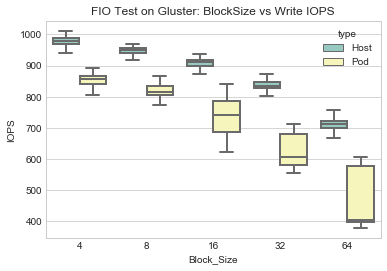

In [221]:
df_host_gluster_bs_write
df_pod_gluster_bs_write

print df_pod_gluster_bs_write
# BOXPLOT  gluster bs write

sns.set_style("whitegrid")

df_host_gluster_bs_write["type"] = "Host"
df_pod_gluster_bs_write["type"] = "Pod"

new_df_host_gluster_bs_write = create_dataframe(df_host_gluster_bs_write)
new_df_pod_gluster_bs_write = create_dataframe(df_pod_gluster_bs_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_gluster_bs_write, new_df_pod_gluster_bs_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Block_Size"] = df_final_form.Block_Size.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Block_Size", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on Gluster: BlockSize vs Write IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_bs_write.png')







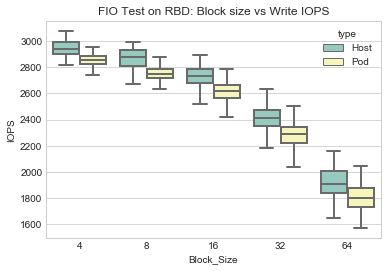

In [212]:
#df_host_rbd_bs_write
#df_pod_rbd_bs_write

# BOXPLOT  rbd bs write

sns.set_style("whitegrid")

df_host_rbd_bs_write["type"] = "Host"
df_pod_rbd_bs_write["type"] = "Pod"

new_df_host_rbd_bs_write = create_dataframe(df_host_rbd_bs_write)
new_df_pod_rbd_bs_write = create_dataframe(df_pod_rbd_bs_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_rbd_bs_write, new_df_pod_rbd_bs_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Block_Size"] = df_final_form.Block_Size.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Block_Size", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on RBD: Block size vs Write IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_rbd_bs_write.png')





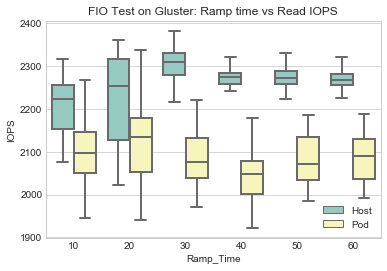

In [240]:
#df_host_gluster_rt_read
#df_pod_gluster_rt_read

# BOXPLOT  gluster rt read

sns.set_style("whitegrid")

df_host_gluster_rt_read["type"] = "Host"
df_pod_gluster_rt_read["type"] = "Pod"

new_df_host_gluster_rt_read = create_dataframe_rt(df_host_gluster_rt_read)
new_df_pod_gluster_rt_read = create_dataframe_rt(df_pod_gluster_rt_read)

df_final_form = None
df_final_form = pd.concat([new_df_host_gluster_rt_read, new_df_pod_gluster_rt_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Ramp_Time"] = df_final_form.Ramp_Time.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Ramp_Time", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0,showfliers=False).set_title('FIO Test on Gluster: Ramp time vs Read IOPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.legend(loc='lower right')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_rt_read.png')






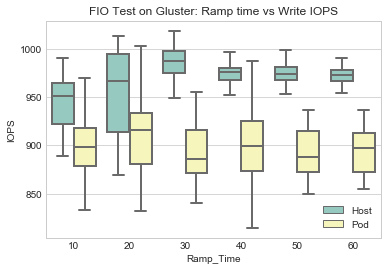

In [241]:
# BOXPLOT  gluster rt write

sns.set_style("whitegrid")

df_host_gluster_rt_write["type"] = "Host"
df_pod_gluster_rt_write["type"] = "Pod"

new_df_host_gluster_rt_write = create_dataframe_rt(df_host_gluster_rt_write)
new_df_pod_gluster_rt_write = create_dataframe_rt(df_pod_gluster_rt_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_gluster_rt_write, new_df_pod_gluster_rt_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Ramp_Time"] = df_final_form.Ramp_Time.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Ramp_Time", y="IOPS", hue="type", 
                 palette="Set3", linewidth=2.0,sym='').set_title('FIO Test on Gluster: Ramp time vs Write IOPS')

plt.legend(loc='lower right')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_rt_write.png')


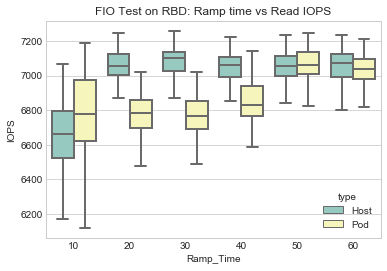

In [215]:
# BOXPLOT  RBD rt read

df_host_rbd_rt_read
sns.set_style("whitegrid")

df_host_rbd_rt_read["type"] = "Host"
df_pod_rbd_rt_read["type"] = "Pod"

new_df_host_rbd_rt_read = create_dataframe_rt(df_host_rbd_rt_read)
new_df_pod_rbd_rt_read = create_dataframe_rt(df_pod_rbd_rt_read)

df_final_form = None
df_final_form = pd.concat([new_df_host_rbd_rt_read, new_df_pod_rbd_rt_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Ramp_Time"] = df_final_form.Ramp_Time.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Ramp_Time", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on RBD: Ramp time vs Read IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_rbd_rt_read.png')


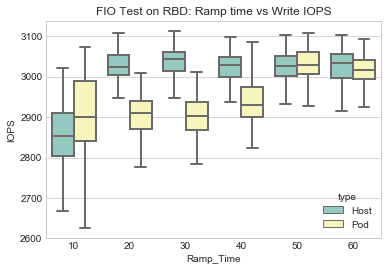

In [216]:
# BOXPLOT  RBD rt write

sns.set_style("whitegrid")

df_host_rbd_rt_write["type"] = "Host"
df_pod_rbd_rt_write["type"] = "Pod"

new_df_host_rbd_rt_write = create_dataframe_rt(df_host_rbd_rt_write)
new_df_pod_rbd_rt_write = create_dataframe_rt(df_pod_rbd_rt_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_rbd_rt_write, new_df_pod_rbd_rt_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["Ramp_Time"] = df_final_form.Ramp_Time.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="Ramp_Time", y="IOPS", hue="type", 
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on RBD: Ramp time vs Write IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_rbd_rt_write.png')

In [189]:
def create_dataframe_depth(dfx):
    df = dfx.copy()
    df_merged = []
    for column in df.columns:
        if column != "type":
            iops = df.loc[:,column]
            t = df.loc[:,"type"]
            df_column = pd.DataFrame({"IOPS":iops, "type":t, "IO_depth": column}) 
            df_merged.append(df_column)
    df_merged = pd.concat(df_merged)
    return df_merged

        4     8    16    32    64  type
0    1937  2136  2094  2052  2100  Host
1    1998  2075  2043  2059  1992  Host
2    1777  2102  2046  2115  2033  Host
3    1779  2150  2024  2050  2038  Host
4    1775  2157  2166  2104  2026  Host
5    1737  2032  2002  2139  2166  Host
6    2035  2073  2138  2105  2046  Host
7    1776  2104  2153  2010  2078  Host
8    1849  2036  2029  2045  2026  Host
9    1988  2027  2181  2039  2156  Host
10   1813  2006  2090  2042  2050  Host
11   1763  2020  2103  2090  2040  Host
12   1635  1980  2107  2102  2107  Host
13   1203  2014  2129  2045  2162  Host
14   1781  2006  2114  2045  2041  Host
15   1526  2108  2098  2168  2073  Host
16   1787  2090  1963  2096  2114  Host
17   1794  2133  2082  2015  2123  Host
18   1998  2008  2048  2078  2009  Host
19   1946  1999  2045  2227  2066  Host
20   1821  2021  2131   737  2005  Host
21   1788  2037  2053  2027  2125  Host
22   1980  2088  2176  2095  2142  Host
23   1974  2173  2065  2186  2027  Host


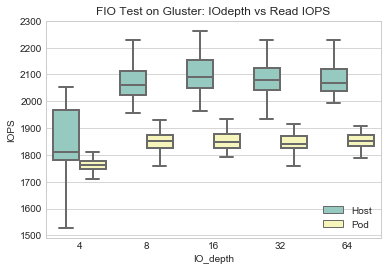

In [242]:
# BOXPLOT  gluster depth read

print df_host_gluster_depth_read
print df_pod_gluster_depth_read
sns.set_style("whitegrid")

df_host_gluster_depth_read["type"] = "Host"
df_pod_gluster_depth_read["type"] = "Pod"

new_df_host_gluster_depth_read = create_dataframe_depth(df_host_gluster_depth_read)
new_df_pod_gluster_depth_read = create_dataframe_depth(df_pod_gluster_depth_read)

df_final_form = None
df_final_form = pd.concat([new_df_host_gluster_depth_read, new_df_pod_gluster_depth_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["IO_depth"] = df_final_form.IO_depth.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="IO_depth", y="IOPS", hue="type", 
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on Gluster: IOdepth vs Read IOPS')
plt.legend(loc='lower right')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_depth_read.png')

       4    8   16   32   64  type
0    831  916  901  875  901  Host
1    854  892  874  881  853  Host
2    761  904  873  907  867  Host
3    761  923  863  873  869  Host
4    762  923  929  900  866  Host
5    744  865  853  919  926  Host
6    867  888  914  900  872  Host
7    761  904  924  857  893  Host
8    790  868  872  871  863  Host
9    847  866  933  869  924  Host
10   775  855  897  873  874  Host
11   755  860  903  891  873  Host
12   699  850  902  901  906  Host
13   515  858  915  871  930  Host
14   763  857  908  871  869  Host
15   654  906  902  932  889  Host
16   767  898  840  902  909  Host
17   767  917  894  859  914  Host
18   858  855  876  885  857  Host
19   829  853  871  957  885  Host
20   780  860  907  316  854  Host
21   766  869  882  869  912  Host
22   846  896  934  893  916  Host
23   844  929  883  937  866  Host
24   710  928  933  874  910  Host
25   468  914  878  919  864  Host
26   835  906  862  871  851  Host
27   847  861  862  

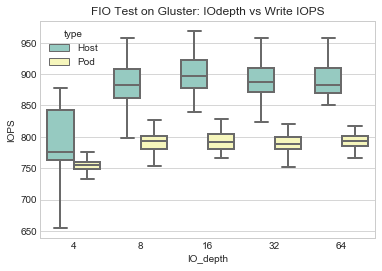

In [218]:
# BOXPLOT  gluster depth write
print df_host_gluster_depth_write
print df_pod_gluster_depth_write
sns.set_style("whitegrid")

df_host_gluster_depth_write["type"] = "Host"
df_pod_gluster_depth_write["type"] = "Pod"

new_df_host_gluster_depth_write = create_dataframe_depth(df_host_gluster_depth_write)
new_df_pod_gluster_depth_write = create_dataframe_depth(df_pod_gluster_depth_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_gluster_depth_write, new_df_pod_gluster_depth_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["IO_depth"] = df_final_form.IO_depth.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="IO_depth", y="IOPS", hue="type", 
                 palette="Set3", linewidth=2.0, showfliers=False, sym='').set_title('FIO Test on Gluster: IOdepth vs Write IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_gluster_depth_write.png')

       4     8    16    32    64  type
0   6823  6963  7256  7099  7073  Host
1   6839  6982  7093  7008  7139  Host
2   6705  6939  7134  7029  6880  Host
3   6698  6995  7070  7126  7010  Host
4   7029  6995  7084  7016  7178  Host
5   7283  7117  6976  6958  7020  Host
6   7244  6857  7136  7075  7069  Host
7   7102  7043  7086  7078  7247  Host
8   7114  7093  7045  7093  7071  Host
9   7214  7055  7101  7021  7083  Host
10  6999  7076  7000  7156  7046  Host
11  7134  7160  6893  7215  7089  Host
12  6942  6931  7123  7113  7013  Host
13  6987  7109  6969  7012  7046  Host
14  6776  7106  7073  7022  7127  Host
15  6895  6959  7119  7067  7172  Host
16  6951  6965  6823  7106  7084  Host
17  7147  7020  7032  7039  7093  Host
18  7105  7058  7115  7204  7200  Host
19  7203  7231  7077  7020  7050  Host
20  7193  7111  7021  7127  7071  Host
21  7013  7008  7072  7188  7004  Host
22  7097  6950  7018  7167  6977  Host
23  7125  6977  6927  7008  7097  Host
24  6996  7002  7243  716

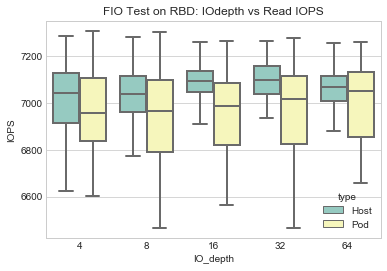

In [219]:
# BOXPLOT  rbd depth read

print df_host_rbd_depth_read
print df_pod_rbd_depth_read
sns.set_style("whitegrid")

df_host_rbd_depth_read["type"] = "Host"
df_pod_rbd_depth_read["type"] = "Pod"

new_df_host_rbd_depth_read = create_dataframe_depth(df_host_rbd_depth_read)
new_df_pod_rbd_depth_read = create_dataframe_depth(df_pod_rbd_depth_read)

df_final_form = None
df_final_form = pd.concat([new_df_host_rbd_depth_read, new_df_pod_rbd_depth_read])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["IO_depth"] = df_final_form.IO_depth.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="IO_depth", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on RBD: IOdepth vs Read IOPS')
fig = ax.get_figure()
fig.savefig('boxplot_rbd_depth_read.png')

       4     8    16    32    64  type
0   2919  2982  3112  3044  3033  Host
1   2922  2988  3042  3005  3061  Host
2   2868  2974  3059  3014  2950  Host
3   2865  2994  3032  3056  3006  Host
4   3006  2998  3038  3008  3078  Host
5   3113  3049  2992  2984  3010  Host
6   3098  2939  3060  3034  3031  Host
7   3037  3017  3038  3035  3108  Host
8   3042  3041  3021  3042  3032  Host
9   3085  3023  3045  3011  3037  Host
10  2993  3034  3002  3069  3021  Host
11  3051  3068  2956  3094  3040  Host
12  2967  2973  3054  3050  3007  Host
13  2988  3042  2989  3007  3021  Host
14  2898  3040  3033  3011  3056  Host
15  2949  2981  3053  3030  3075  Host
16  2972  2986  2926  3047  3038  Host
17  3059  3005  3015  3019  3042  Host
18  3039  3025  3051  3089  3088  Host
19  3080  3098  3035  3010  3023  Host
20  3077  3046  3011  3056  3032  Host
21  2999  2998  3033  3083  3003  Host
22  3039  2979  3010  3073  2992  Host
23  3046  2989  2970  3005  3043  Host
24  2992  3001  3106  307

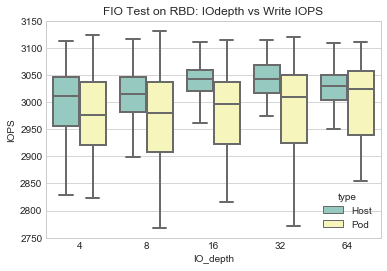

In [244]:
# BOXPLOT  rbd depth write

print df_host_rbd_depth_write
print df_pod_rbd_depth_write
sns.set_style("whitegrid")

df_host_rbd_depth_write["type"] = "Host"
df_pod_rbd_depth_write["type"] = "Pod"

new_df_host_rbd_depth_write = create_dataframe_depth(df_host_rbd_depth_write)
new_df_pod_rbd_depth_write = create_dataframe_depth(df_pod_rbd_depth_write)

df_final_form = None
df_final_form = pd.concat([new_df_host_rbd_depth_write, new_df_pod_rbd_depth_write])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["IO_depth"] = df_final_form.IO_depth.astype("int")
df_final_form["IOPS"] = df_final_form.IOPS.astype("int")

ax = sns.boxplot(data=df_final_form,x="IO_depth", y="IOPS", hue="type",
                 palette="Set3", linewidth=2.0, sym='').set_title('FIO Test on RBD: IOdepth vs Write IOPS')

fig = ax.get_figure()
fig.savefig('boxplot_rbd_depth_write.png')